In [41]:
import numpy as np 
import pandas as pd

In [42]:
df = pd.read_csv('C:/Users/User/Downloads/Churn_Modelling.csv')

In [43]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [44]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.shape

(10000, 11)

In [47]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [48]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [49]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [50]:
df.shape

(10000, 12)

In [51]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [52]:
from sklearn.model_selection import train_test_split

In [57]:
y=df['Exited']
x=df.drop(columns=['Exited'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
x_train.shape

(8000, 11)

In [59]:
x_test.shape

(2000, 11)

In [62]:
y_train.shape

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [63]:
y_test.shape

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [80]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [82]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [96]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 0.4105 - accuracy: 0.8291 - val_loss: 0.4151 - val_accuracy: 0.8281
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.4102 - accuracy: 0.8294 - val_loss: 0.4148 - val_accuracy: 0.8275
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4099 - accuracy: 0.8289 - val_loss: 0.4145 - val_accuracy: 0.8288
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.4097 - accuracy: 0.8291 - val_loss: 0.4143 - val_accuracy: 0.8288
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4094 - accuracy: 0.8292 - val_loss: 0.4140 - val_accuracy: 0.8281
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4091 - accuracy: 0.8297 - val_loss: 0.4139 - val_accuracy: 0.8281
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4089 - accuracy: 0.8302 - val_loss: 0.4136 - val_accuracy: 0.8288
Epoch

In [97]:
model.layers[0].get_weights()

[array([[-0.16452406,  0.15241121,  0.02940588],
        [ 2.3474905 , -3.1836753 , -0.15240556],
        [-0.01174928,  0.140042  ,  0.13754624],
        [ 0.05660848, -0.01905774, -0.4180506 ],
        [-0.07262682,  0.08444048,  0.20487356],
        [-0.15274201, -0.06208932, -0.03205943],
        [ 0.09932228, -0.5145367 ,  1.8193256 ],
        [-0.04764868,  0.1086515 , -0.23834509],
        [ 0.5043579 , -0.3612276 , -0.7693128 ],
        [-0.08191834, -0.16594139, -0.15256633],
        [-0.18733695,  0.31559157,  0.5989863 ]], dtype=float32),
 array([-0.24111064,  0.50014246,  0.5438529 ], dtype=float32)]

In [98]:
model.layers[1].get_weights()

[array([[ 1.1261399],
        [-1.5494529],
        [-1.8122432]], dtype=float32),
 array([-0.21488087], dtype=float32)]

In [99]:
y_log = model.predict(x_test_scaled)
y_pred = np.where(y_log>0.5,1,0)

63/63 [==============================] - 1s 8ms/step


In [100]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
y_pred = y_pred.argmax(axis=1)

In [102]:
y_pred.shape

(2000,)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [104]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


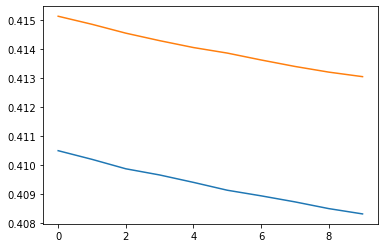

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

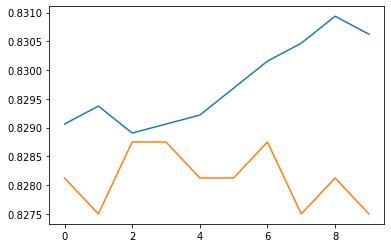

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])